In [1]:
import xarray as xr
import rioxarray
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

---

In [3]:
def open_classified_map(filepath):
    da = rioxarray.open_rasterio(filepath).squeeze()
    ds = da.to_dataset(dim='band')
    ds = ds.rename_vars({1:ds.attrs['long_name'][0],
                         2:ds.attrs['long_name'][1],
                         3:ds.attrs['long_name'][2],
                         4:ds.attrs['long_name'][3]})
    ds.attrs['long_name'] = filepath.split('\\')[-1].split('.')[0]
    ds.attrs['swe_option'] = ds.attrs['long_name'].split('_')[-4]
    ds.attrs['swe_threshold'] = ds.attrs['long_name'].split('_')[-3]
    ds.attrs['veg_option'] = ds.attrs['long_name'].split('_')[-2]
    ds.attrs['veg_thresholds'] = ds.attrs['long_name'].split('_')[-1]
    
    return ds

In [4]:
base_filepath = r'C:\Users\steve\OneDrive\Documents\School Stuff\UW\Mountain Hydrology Research Group\Snow Sensor Usability Paper - Passive Microwave\sensitivity_test_results\ssum_output'

In [5]:
ds_globsnow_150_tcc_50_75 = open_classified_map(base_filepath + '\quebec_ssum_globsnow_150_tcc_50-75.tif')
ds_globsnow_200_tcc_50_75 = open_classified_map(base_filepath + '\quebec_ssum_globsnow_200_tcc_50-75.tif')
ds_gdas_150_tcc_50_75 = open_classified_map(base_filepath + '\quebec_ssum_noahmp_gdas_150_tcc_50-75.tif')
ds_gdas_200_tcc_50_75 = open_classified_map(base_filepath + '\quebec_ssum_noahmp_gdas_200_tcc_50-75.tif')
ds_ecmwf_150_tcc_50_75 = open_classified_map(base_filepath + '\quebec_ssum_noahmp_ecmwf_150_tcc_50-75.tif')
ds_ecmwf_200_tcc_50_75 = open_classified_map(base_filepath + '\quebec_ssum_noahmp_ecmwf_200_tcc_50-75.tif')
ds_globsnow_150_tcc_20_30 = open_classified_map(base_filepath + '\quebec_ssum_globsnow_150_tcc_20-30.tif')
ds_globsnow_200_tcc_20_30 = open_classified_map(base_filepath + '\quebec_ssum_globsnow_200_tcc_20-30.tif')
ds_gdas_150_tcc_20_30 = open_classified_map(base_filepath + '\quebec_ssum_noahmp_gdas_150_tcc_20-30.tif')
ds_gdas_200_tcc_20_30 = open_classified_map(base_filepath + '\quebec_ssum_noahmp_gdas_200_tcc_20-30.tif')
ds_ecmwf_150_tcc_20_30 = open_classified_map(base_filepath + '\quebec_ssum_noahmp_ecmwf_150_tcc_20-30.tif')
ds_ecmwf_200_tcc_20_30 = open_classified_map(base_filepath + '\quebec_ssum_noahmp_ecmwf_200_tcc_20-30.tif')
ds_globsnow_150_lai_18_38 = open_classified_map(base_filepath + '\quebec_ssum_globsnow_150_lai_18-38.tif')
ds_globsnow_200_lai_18_38 = open_classified_map(base_filepath + '\quebec_ssum_globsnow_200_lai_18-38.tif')
ds_gdas_150_lai_18_38 = open_classified_map(base_filepath + '\quebec_ssum_noahmp_gdas_150_lai_18-38.tif')
ds_gdas_200_lai_18_38 = open_classified_map(base_filepath + '\quebec_ssum_noahmp_gdas_200_lai_18-38.tif')
ds_ecmwf_150_lai_18_38 = open_classified_map(base_filepath + '\quebec_ssum_noahmp_ecmwf_150_lai_18-38.tif')
ds_ecmwf_200_lai_18_38 = open_classified_map(base_filepath + '\quebec_ssum_noahmp_ecmwf_200_lai_18-38.tif')

In [6]:
# create a custom colormap for the classification maps
colors = ["#c15433","#1d8e30","#dcd72b"]
n_bin = 3
cmap = LinearSegmentedColormap.from_list('ssum', colors, N=n_bin)

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

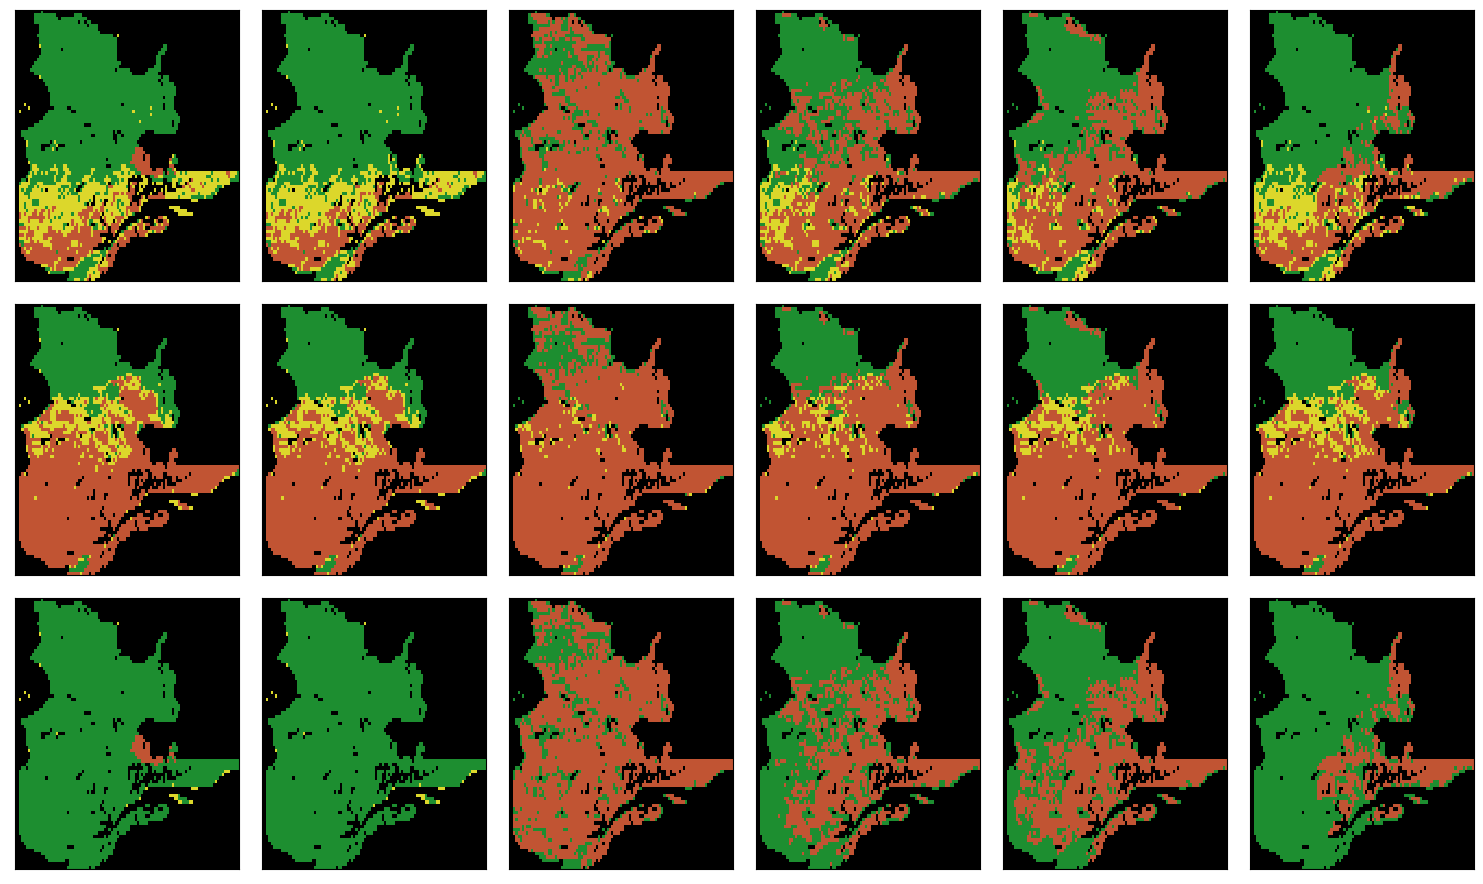

In [8]:
fig, ax = plt.subplots(nrows=3,ncols=6,figsize=(15,9),
                       tight_layout=True, sharex=True, sharey=True,
                       gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 1]})

# give each subplot a unique name
[ax_globsnow_150_tcc_50_75, ax_globsnow_200_tcc_50_75, 
 ax_gdas_150_tcc_50_75, ax_gdas_200_tcc_50_75, 
 ax_ecmwf_150_tcc_50_75, ax_ecmwf_200_tcc_50_75, 
 ax_globsnow_150_tcc_20_30, ax_globsnow_200_tcc_20_30,
 ax_gdas_150_tcc_20_30, ax_gdas_200_tcc_20_30,
 ax_ecmwf_150_tcc_20_30, ax_ecmwf_200_tcc_20_30,
 ax_globsnow_150_lai_18_38, ax_globsnow_200_lai_18_38,
 ax_gdas_150_lai_18_38, ax_gdas_200_lai_18_38,
 ax_ecmwf_150_lai_18_38, ax_ecmwf_200_lai_18_38] = ax.ravel()


ds_globsnow_150_tcc_50_75.Sensor_Classification.plot(ax=ax_globsnow_150_tcc_50_75,vmin=0, vmax=3, cmap=cmap, add_colorbar=False) 
ds_globsnow_200_tcc_50_75.Sensor_Classification.plot(ax=ax_globsnow_200_tcc_50_75,vmin=0, vmax=3, cmap=cmap, add_colorbar=False) 
ds_gdas_150_tcc_50_75.Sensor_Classification.plot(ax=ax_gdas_150_tcc_50_75,vmin=0, vmax=3, cmap=cmap, add_colorbar=False)
ds_gdas_200_tcc_50_75.Sensor_Classification.plot(ax=ax_gdas_200_tcc_50_75,vmin=0, vmax=3, cmap=cmap, add_colorbar=False)
ds_ecmwf_150_tcc_50_75.Sensor_Classification.plot(ax=ax_ecmwf_150_tcc_50_75,vmin=0, vmax=3, cmap=cmap, add_colorbar=False)
ds_ecmwf_200_tcc_50_75.Sensor_Classification.plot(ax=ax_ecmwf_200_tcc_50_75,vmin=0, vmax=3, cmap=cmap, add_colorbar=False)

ds_globsnow_150_tcc_20_30.Sensor_Classification.plot(ax=ax_globsnow_150_tcc_20_30,vmin=0, vmax=3, cmap=cmap, add_colorbar=False) 
ds_globsnow_200_tcc_20_30.Sensor_Classification.plot(ax=ax_globsnow_200_tcc_20_30,vmin=0, vmax=3, cmap=cmap, add_colorbar=False) 
ds_gdas_150_tcc_20_30.Sensor_Classification.plot(ax=ax_gdas_150_tcc_20_30,vmin=0, vmax=3, cmap=cmap, add_colorbar=False)
ds_gdas_200_tcc_20_30.Sensor_Classification.plot(ax=ax_gdas_200_tcc_20_30,vmin=0, vmax=3, cmap=cmap, add_colorbar=False)
ds_ecmwf_150_tcc_20_30.Sensor_Classification.plot(ax=ax_ecmwf_150_tcc_20_30,vmin=0, vmax=3, cmap=cmap, add_colorbar=False)
ds_ecmwf_200_tcc_20_30.Sensor_Classification.plot(ax=ax_ecmwf_200_tcc_20_30,vmin=0, vmax=3, cmap=cmap, add_colorbar=False)

ds_globsnow_150_lai_18_38.Sensor_Classification.plot(ax=ax_globsnow_150_lai_18_38,vmin=0, vmax=3, cmap=cmap, add_colorbar=False) 
ds_globsnow_200_lai_18_38.Sensor_Classification.plot(ax=ax_globsnow_200_lai_18_38,vmin=0, vmax=3, cmap=cmap, add_colorbar=False) 
ds_gdas_150_lai_18_38.Sensor_Classification.plot(ax=ax_gdas_150_lai_18_38,vmin=0, vmax=3, cmap=cmap, add_colorbar=False)
ds_gdas_200_lai_18_38.Sensor_Classification.plot(ax=ax_gdas_200_lai_18_38,vmin=0, vmax=3, cmap=cmap, add_colorbar=False)
ds_ecmwf_150_lai_18_38.Sensor_Classification.plot(ax=ax_ecmwf_150_lai_18_38,vmin=0, vmax=3, cmap=cmap, add_colorbar=False)
ds_ecmwf_200_lai_18_38.Sensor_Classification.plot(ax=ax_ecmwf_200_lai_18_38,vmin=0, vmax=3, cmap=cmap, add_colorbar=False)


# hide all axes (lines, ticks, labels, etc.)
for this_ax in ax.ravel():
    #this_ax.set_aspect(1)
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    this_ax.set_xlabel('')
    this_ax.set_ylabel('')
    this_ax.set_title('')
    this_ax.set_facecolor("black")
## 150 mm swe title
#for this_ax in [ax_globsnow_150_tcc_50_75, 
#                ax_gdas_150_tcc_50_75, 
#                ax_ecmwf_150_tcc_50_75]:
#    this_ax.set_title('150 mm')
## 200 mm swe title
#for this_ax in [ax_globsnow_200_tcc_50_75, 
#                ax_gdas_200_tcc_50_75, 
#                ax_ecmwf_200_tcc_50_75]:
#    this_ax.set_title('200 mm')
#for this_ax in [ax_globsnow_150_tcc_50_75, 
#                ax_globsnow_150_tcc_20_30,
#                ax_globsnow_150_lai_18_38]:
#    this_ax.set_ylabel('TCC')
#

plt.savefig('figures/sensitivity_test_result_maps.jpg')

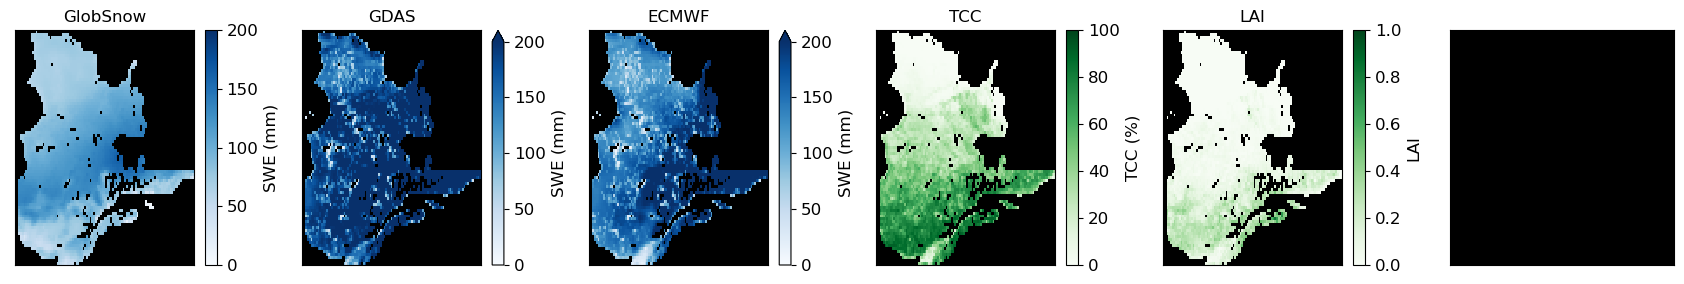

In [9]:
fig, ax = plt.subplots(nrows=1,ncols=6,figsize=(17,3),
                       tight_layout=True, sharex=True, sharey=True,
                       gridspec_kw={'width_ratios': [1, 1, 1, 1, 1, 1]})

# give each subplot a unique name
[ax_globsnow_150_tcc_50_75,ax_gdas_150_tcc_50_75,ax_ecmwf_150_tcc_50_75,ax_globsnow_200_tcc_50_75,ax_globsnow_150_lai_18_38,_] = ax.ravel()


ds_globsnow_150_tcc_50_75.SWE_avg.plot(ax=ax_globsnow_150_tcc_50_75,vmin=0, vmax=200, cmap='Blues', add_colorbar=True, cbar_kwargs={'label': 'SWE (mm)'})
ax_globsnow_150_tcc_50_75.set_title('GlobSnow')

ds_gdas_150_tcc_50_75.SWE_avg.plot(ax=ax_gdas_150_tcc_50_75,vmin=0, vmax=200, cmap='Blues', add_colorbar=True, cbar_kwargs={'label': 'SWE (mm)'})
ax_gdas_150_tcc_50_75.set_title('GDAS')

ds_ecmwf_150_tcc_50_75.SWE_avg.plot(ax=ax_ecmwf_150_tcc_50_75,vmin=0, vmax=200, cmap='Blues', add_colorbar=True, cbar_kwargs={'label': 'SWE (mm)'})
ax_ecmwf_150_tcc_50_75.set_title('ECMWF')

ds_globsnow_200_tcc_50_75.TCC_avg.plot(ax=ax_globsnow_200_tcc_50_75,vmin=0, vmax=100, cmap='Greens', add_colorbar=True, cbar_kwargs={'label': 'TCC (%)'})
ax_globsnow_200_tcc_50_75.set_title('TCC')

ds_globsnow_150_lai_18_38.TCC_avg.plot(ax=ax_globsnow_150_lai_18_38,vmin=0, vmax=1, cmap='Greens', add_colorbar=True, cbar_kwargs={'label': 'LAI'}) 
ax_globsnow_150_lai_18_38.set_title('LAI')

# hide all axes (lines, ticks, labels, etc.)
for this_ax in ax.ravel():
    this_ax.set_xticks([])
    this_ax.set_yticks([])
    this_ax.set_xlabel('')
    this_ax.set_ylabel('')
    this_ax.set_facecolor("black")
    
plt.savefig('figures/sensitivity_test_inputs.jpg')